In [5]:
! pip install C:/Users/Lina/Anaconda3/envs/opencv_python-3.1.0-cp35-cp35m-win_amd64.whl
! pip install C:/Users/Lina/Anaconda3/envs/pycairo-1.10.0-cp35-none-win_amd64.whl

Processing c:\users\lina\anaconda3\envs\opencv_python-3.1.0-cp35-cp35m-win_amd64.whl


In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import draw, feature
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from pylab import *
from skimage.exposure import rescale_intensity, equalize_hist, equalize_adapthist
from skimage import draw

In [2]:
%matplotlib inline
plt.style.use('seaborn-white')

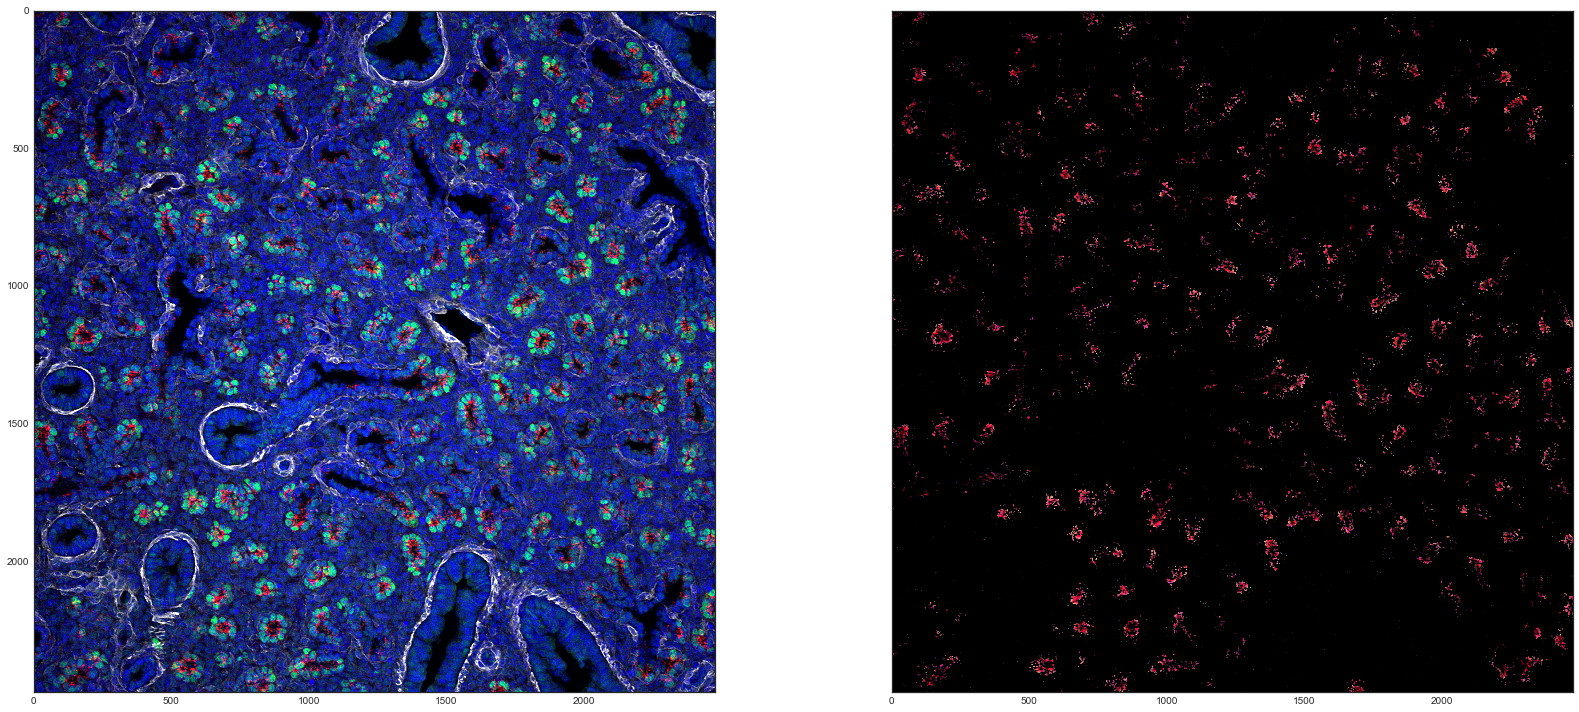

In [3]:
# Only keep red
im = cv2.imread("C:/Users/Lina/Anaconda2/Notebook/images/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_002.tif")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im2 = Image.open("C:/Users/Lina/Anaconda2/Notebook/images/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_002.tif")
width,height = im2.size
for x in range(width):
    for y in range(height):
        r,g,b=im2.getpixel((x,y))
        if (b>r and b>g):
            im2.putpixel((x,y),0)
        if (b>150 and g > 150 and r > 150):
            im2.putpixel((x,y),0)
        if (g>r and g>b):
            im2.putpixel((x,y),0)

fig, axes = plt.subplots(1, 2, figsize=(25, 10), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(im)
axes[1].imshow(im2, cmap='gray')
plt.tight_layout()

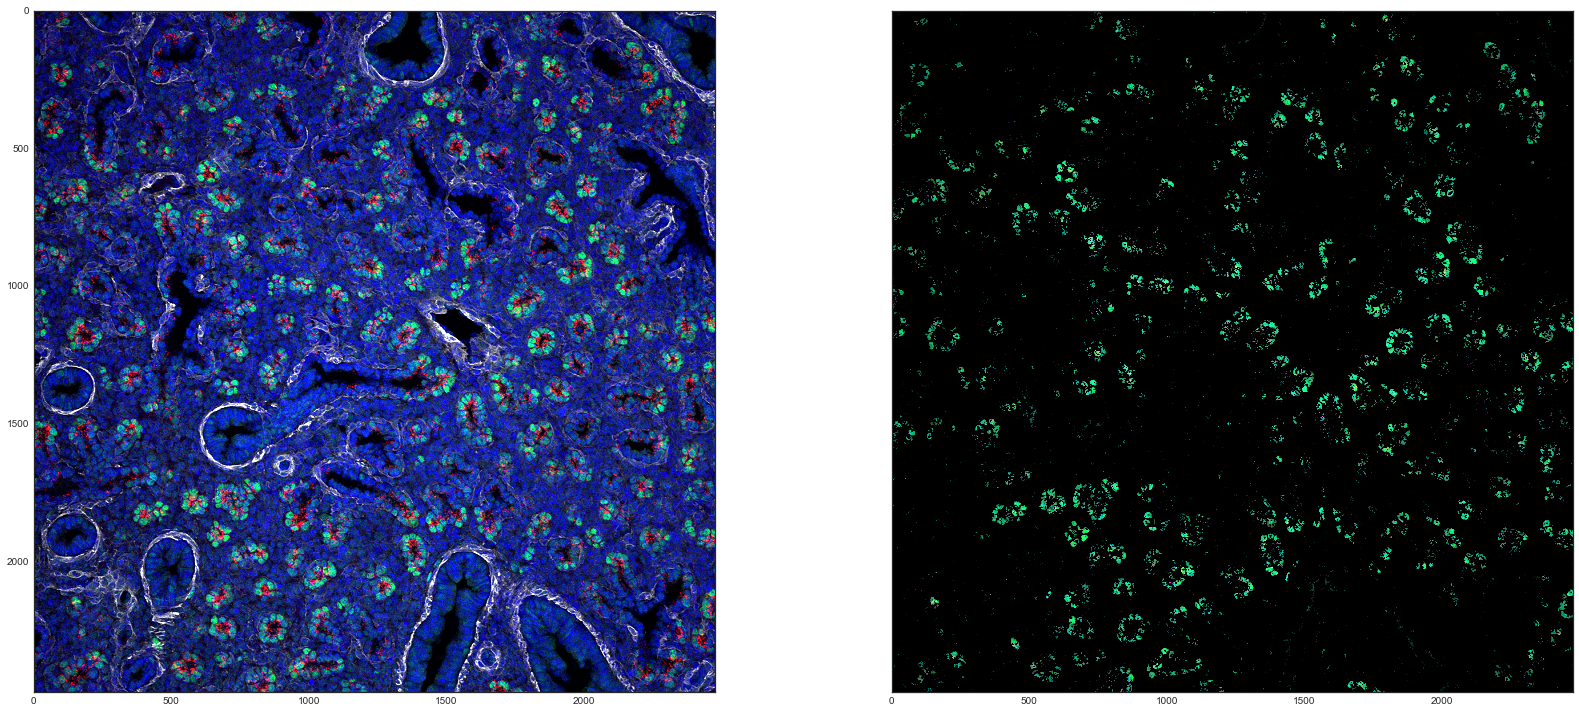

In [4]:
# Only keep green
im3 = Image.open("C:/Users/Lina/Anaconda2/Notebook/images/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_002.tif")
width,height = im3.size
for x in range(width):
    for y in range(height):
        r,g,b=im3.getpixel((x,y))
        if (b>r and b>g):
            im3.putpixel((x,y),0)
        if (b>150 and g > 150 and r > 150):
            im3.putpixel((x,y),0)
        if (r>g and r>b):
            im3.putpixel((x,y),0)

fig, axes = plt.subplots(1, 2, figsize=(25, 10), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(im)
axes[1].imshow(im3, cmap='gray')
plt.tight_layout()

In [5]:
im3_array = np.array(im3)
im3_blur = cv2.GaussianBlur(im3_array, (33,33),0)

# test with denoising on green image
kernel = np.ones((30,30),np.uint8)
opening = cv2.morphologyEx(im3_blur, cv2.MORPH_OPEN, kernel)
im3_gray = rgb2gray(opening)
im3_gray = equalize_hist(im3_gray)
# no denoise
im3_gray2 = rgb2gray(im3_blur)
im3_gray2 = equalize_hist(im3_gray2)

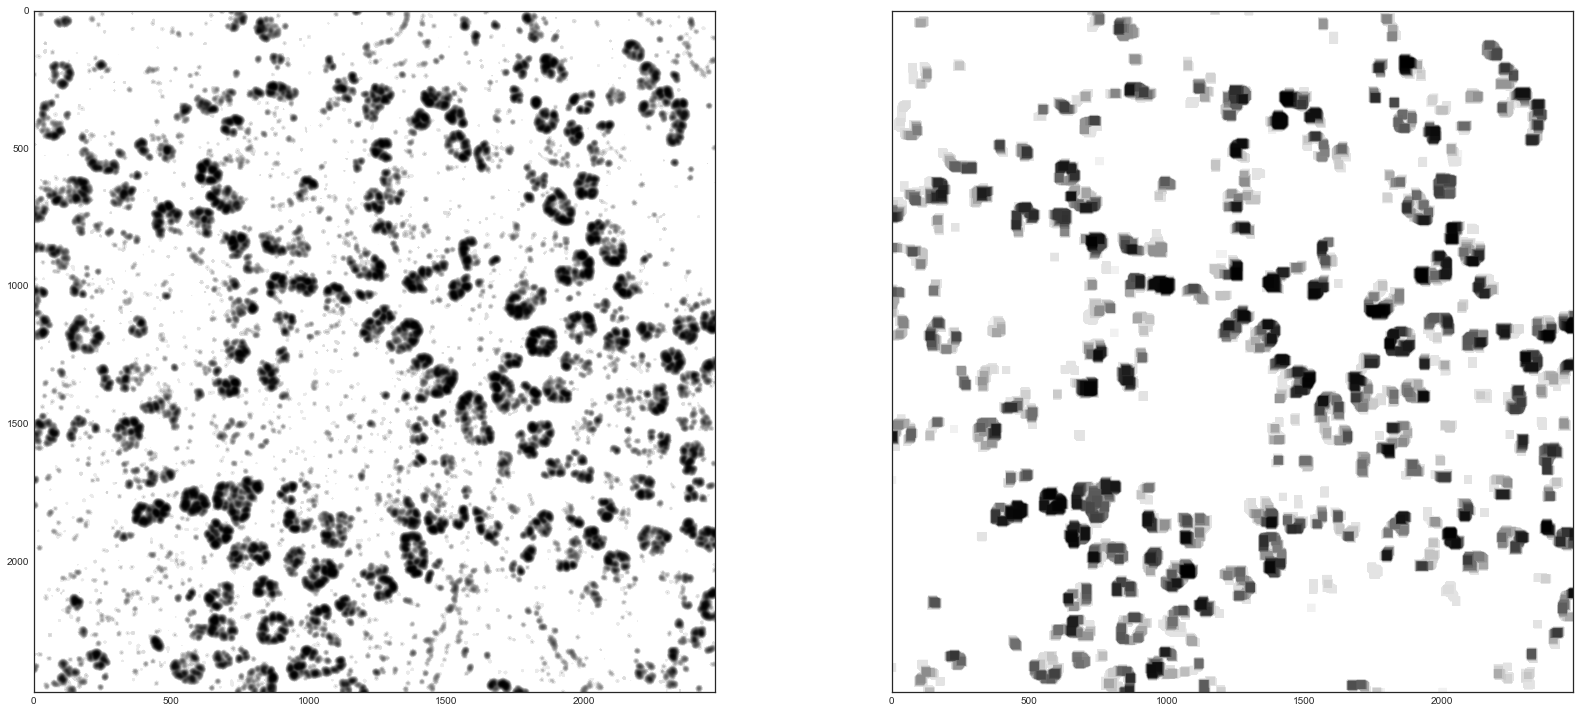

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(im3_gray2)
axes[1].imshow(im3_gray)
plt.tight_layout()

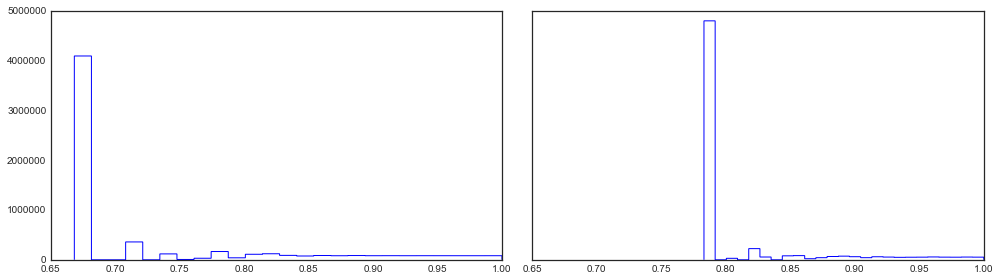

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].hist(im3_gray2.ravel(), 25, histtype='step')
axes[1].hist(im3_gray.ravel(), 25, histtype='step')
plt.tight_layout()
# left is not denoised, right is denoised

In [8]:
# adjust red image
im2_array = np.array(im2)

im2_blur = cv2.GaussianBlur(im2_array, (93,93),0)

#R, G, B = cv2.split(im_blur)    
#R_norm = cv2.normalize(R,R,100, 255, cv2.NORM_MINMAX)
#im_blur = cv2.merge((R_norm,G, B))
im2_gray = rgb2gray(im2_blur)
im2_gray = equalize_adapthist(im2_gray)

C:\Users\Lina\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [151]:
# convert to numpy array
im3_array = np.array(im3)


im3_blur = cv2.GaussianBlur(im3_array, (93,93),0)

#R, G, B = cv2.split(im_blur)    
#R_norm = cv2.normalize(R,R,100, 255, cv2.NORM_MINMAX)
#im_blur = cv2.merge((R_norm,G, B))
im3_gray = rgb2gray(im3_blur)

im3_gray = equalize_hist(im3_gray)

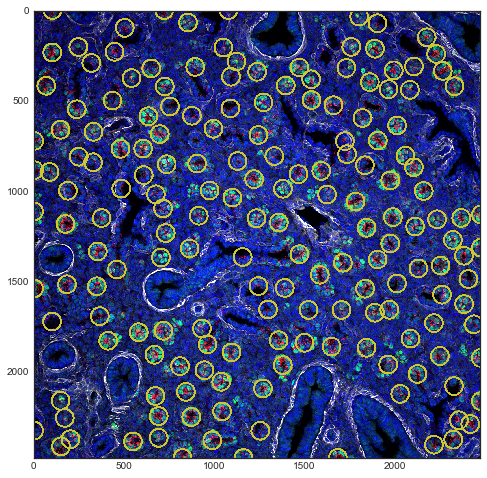

In [9]:
im = cv2.imread("C:/Users/Lina/Anaconda2/Notebook/images/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_002.tif")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
blobs_dog = blob_dog(im2_gray, min_sigma=35, max_sigma=50, threshold=.5)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
#blob_dog(im_gray)
#ax = axes[0]
figure(figsize=(14, 8))
ax=plt.axes()
ax.imshow(im, interpolation='nearest', cmap='gray')
for blob in blobs_dog:
    y,x,r = blob
    x=int(x)
    y=int(y)
    r=int(r)
    #rr, cc = draw.circle(x,y,r)
    cv2.circle(im, (x,y),r, color=(205,200,50), thickness = 10)
    #if max(rr)>2475:
     #   continue
    #avg_R, avg_G, avg_B = mean(im[cc,rr][:,0]), mean(im[cc,rr][:,1]), mean(im[cc,rr][:,2])
    #if avg_G > 40:
     #   c = plt.Circle((x,y),r, color="orange", linewidth=2, fill=False)
    #  ax.add_patch(c)
    

IndexError: index 2475 is out of bounds for axis 0 with size 2475

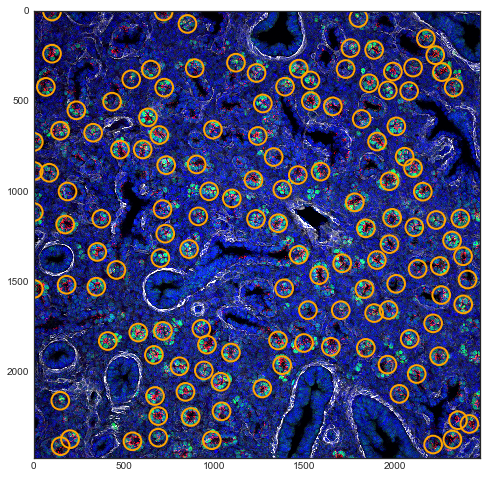

In [10]:
#keep proximal acinar tubules if it apears Green inside circle
im = cv2.imread("C:/Users/Lina/Anaconda2/Notebook/images/2015-04-029_20X_C57Bl6_E16.5_LMM.14.24.4.46_SOX9_SFTPC_ACTA2_002.tif")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
blobs_dog = blob_dog(im2_gray, min_sigma=35, max_sigma=50, threshold=.5)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
#blob_dog(im_gray)
#ax = axes[0]
figure(figsize=(14, 8))
ax=plt.axes()
ax.imshow(im, interpolation='nearest', cmap='gray')
for blob in blobs_dog:
    y,x,r = blob
    x=int(x)
    y=int(y)
    r=int(r)
    rr, cc = draw.circle(x,y,r)
    #cv2.circle(im, (x,y),r, color=(205,200,50), thickness = 10)
    if max(rr)>2475:
        continue
    avg = mean(im3_gray[cc,rr])
    if avg > 0.8:
        c = plt.Circle((x,y),r, color="orange", linewidth=2, fill=False)
        ax.add_patch(c)
    